In [11]:
from gluoncv import model_zoo, data, utils
import numpy as np

class ObjectDetector:
    """
    Class used for detecting objects inside a given image
    
    Attributes
    ----------
    net : pretrained-model from gluoncv, using ssd architecture trained on the coco dataset.
    threshold : int - the threshold for the detections to be considered positive.
    """
    
    def __init__(self):
        self.net = model_zoo.get_model('ssd_512_mobilenet1.0_coco', pretrained=True)
        self.threshold = 0.5

    def get_bounding_box_coordinates(self,bounding_boxes,index):
        """
        Parameters
        ----------
        bounding_boxes = mxnet.NDarray(Nx4)list containing all the bounding_boxes coordinates
        index = int - the index of the wanted bounding-box
        
        Returns
        ----
        A pair of 4 items(c1,l1,c2,l2)describing the top left and bottom right corners of the bounding box
        """
        flat_bounding_box = bounding_boxes[index].asnumpy()
        c1 = int(flat_bounding_box.item(0))
        l1 = int(flat_bounding_box.item(1))
        c2 = int(flat_bounding_box.item(2))
        l2 = int(flat_bounding_box.item(3))
        return c1,l1,c2,l2
    
    
    def get_object_detections(self,image):
        """
        Parameters
        ----------
        image = mxnet.NDarray - the image for which we want to extract the detections
        
        Returns
        ----
        np.array of size (NxWixHix3) where : 
        N = number of detections. 
        Wi = width of the i-th image. 
        Hi = height of the i-th image
        """ 
        x, img = data.transforms.presets.ssd.transform_test(image, short=512)
        print('Shape of pre-processed image:', x.shape)
        class_IDs, scores, bounding_boxes = net(x)
        detections = []
        counter = 0
        while (scores[0][counter] > self.threshold):
            c1,l1,c2,l2 = self.get_bounding_box_coordinates(bounding_boxes[0],counter)
            detections.append(img[l1:l2,c1:c2])
            counter = counter + 1    
        return np.array(detections)
    

test.jpeg
/home/george/Licenta/Anomaly detection in video/test/test.jpeg
Shape of pre-processed image: (1, 3, 512, 683)


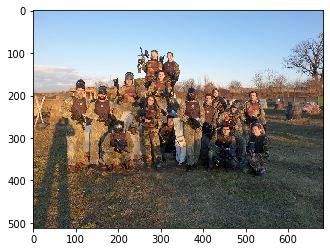

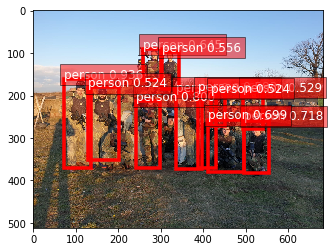


[[ 73.04797   161.20937   135.6259    370.66425  ]
 [336.83228   192.09482   398.7967    372.7521   ]
 [243.85118   213.38196   299.5317    370.57135  ]
 [495.70752   259.95767   554.7875    383.82175  ]
 [412.10217   257.22705   495.85852   379.67224  ]
 [259.46637    91.16693   300.65424   164.49446  ]
 [388.26706   191.94449   431.2925    370.42807  ]
 [304.12573    97.55044   344.15082   184.59799  ]
 [494.62387   192.70288   541.19574   278.85577  ]
 [419.76495   194.5747    452.57373   272.0858   ]
 [130.61923   181.01514   203.93524   353.25726  ]
 [ 69.99193    99.00903   499.27087   404.48514  ]
 [  2.4532337 202.97247    42.295967  277.67126  ]
 [391.55286   194.817     427.3327    279.44806  ]
 [158.4871    256.6859    241.2347    374.39752  ]
 [297.5778    254.26506   332.98715   354.81744  ]
 [456.9403    213.67807   492.6914    286.06454  ]
 [201.42737   147.18408   244.74982   221.30325  ]
 [249.82402    92.84384   279.9188    156.10072  ]
 [279.6499    264.0667    311.

NameError: name 'get_bounding_box_coordinates' is not defined

In [13]:
import os
import sys
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

net = model_zoo.get_model('ssd_512_mobilenet1.0_coco', pretrained=True)

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "test")
#get a random file name from the image_directory
demo_image_name = os.listdir(IMAGE_DIR)[0]
print(demo_image_name)
demo_img_path = os.path.join(IMAGE_DIR,demo_image_name)
print(demo_img_path)
x, img = data.transforms.presets.ssd.load_test(demo_img_path, short=512)
print('Shape of pre-processed image:', x.shape)
plt.figure()
plt.imshow(img)
class_IDs, scores, bounding_boxes = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()
print(bounding_boxes[0])
print(scores[0])
counter = 0
threshold = 0.5
while (scores[0][counter] > threshold):
    c1,l1,c2,l2 = get_bounding_box_coordinates(bounding_boxes[0],counter)
    plt.figure()
    plt.imshow(img[l1:l2,c1:c2]);
    counter = counter + 1
    
    
    
    

test.jpeg
/home/george/Licenta/Anomaly detection in video/test/test.jpeg
Shape of pre-processed image: (1, 3, 512, 683)


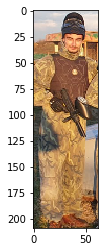

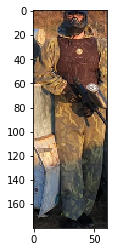

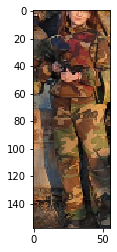

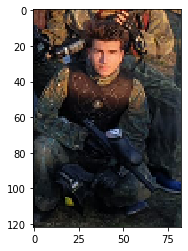

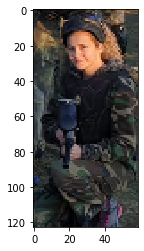

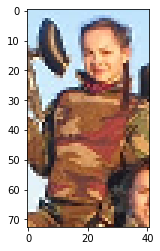

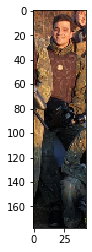

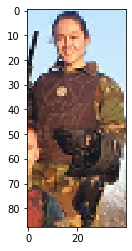

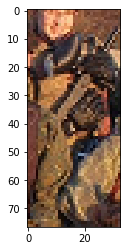

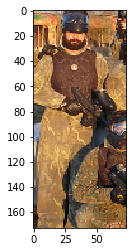

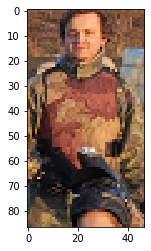

In [14]:
import os
import sys
from matplotlib.image import imread
import mxnet as mx
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt


net = model_zoo.get_model('ssd_512_mobilenet1.0_coco', pretrained=True)

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "test")
#get a random file name from the image_directory
demo_image_name = os.listdir(IMAGE_DIR)[0]
print(demo_image_name)
demo_img_path = os.path.join(IMAGE_DIR,demo_image_name)
print(demo_img_path)
image = imread(demo_img_path)
image = mx.nd.array(image)
image = image.astype(np.uint8)
object_detector = ObjectDetector()
detections = object_detector.get_object_detections(image)
for image in detections:
    plt.figure()
    plt.imshow(image)